## Getting the dataset ready
Instead of utilizing real dataset with actual personal identifiable information (PII), a solution would be to generate a sample dataset randomly.

In [15]:
import random
import pandas as pd
import time
import matplotlib.pyplot as mp

def generate_dataset(file_path, n):
     
    #Create a dataset contaning n-long rows
    
    first_names = ["Harry","Ross", "Bruce","Cook", "Carolyn","Morgan","Albert","Walker", "Randy","Reed","Larry","Barnes",\
                        "Lois","Wilson","Jesse","Campbell","Ernest","Rogers","Theresa","Patterson", "Henry","Simmons",\
                        "Michelle","Perry","Frank","Butler","Shirley","Brooks","Rachel","Edwards","Christopher","Perez",\
                    "Thomas","Baker","Sara","Moore","Chris","Bailey","Roger","Johnson","Marilyn","Thompson","Anthony","Evans",\
                    "Julie","Hall","Paula","Phillips","Annie","Hernandez","Dorothy","Murphy","Alice","Howard"]
    
    
    last_names = ["Ruth","Jackson", "Debra","Allen", "Gerald","Harris", "Raymond","Carter","Jacqueline","Torres",\
                    "Joseph","Nelson","Carlos","Sanchez", "Ralph","Clark", "Jean","Alexander","Stephen","Roberts",\
                    "Eric","Long","Amanda","Scott","Teresa","Diaz","Wanda","Thomas", "Wanda","Thomas",\
                  "Anderson", "Ashwoon", "Aikin", "Bateman", "Bongard", "Bowers", "Boyd", "Cannon", "Cast", "Deitz",\
                  "Dewalt", "Ebner", "Frick", "Hancock", "Haworth", "Hesch", "Hoffman", "Kassing", "Knutson", "Lawless",\
                  "Lawicki", "Mccord", "McCormack", "Miller", "Myers", "Nugent", "Ortiz", "Orwig", "Ory", "Paiser", "Pak",\
                  "Pettigrew", "Quinn", "Quizoz", "Ramachandran", "Resnick", "Sagar", "Schickowski", "Schiebel", "Sellon",\
                  "Severson", "Shaffer", "Solberg", "Soloman", "Sonderling", "Soukup", "Soulis", "Stahl", "Sweeney", "Tandy",\
                  "Trebil", "Trusela", "Trussel", "Turco", "Uddin", "Uflan", "Ulrich", "Upson", "Vader", "Vail", "Valente",\
                  "Van Zandt", "Vanderpoel", "Ventotla", "Vogal", "Wagle", "Wagner", "Wakefield", "Weinstein", "Weiss", "Woo",\
                  "Yang", "Yates", "Yocum", "Zeaser", "Zeller", "Ziegler", "Bauer", "Baxster", "Casal", "Cataldi", "Caswell",\
                  "Celedon", "Chambers", "Chapman", "Christensen", "Darnell", "Davidson", "Davis", "DeLorenzo", "Dinkins",\
                  "Doran", "Dugelman", "Dugan", "Duffman", "Eastman", "Ferro", "Ferry", "Fletcher", "Fietzer", "Hylan",\
                  "Hydinger", "Illingsworth", "Ingram", "Irwin", "Jagtap", "Jenson", "Johnson", "Johnsen", "Jones",\
                  "Jurgenson", "Kalleg", "Kaskel", "Keller", "Leisinger", "LePage", "Lewis", "Linde", "Lulloff", "Maki",\
                  "Martin", "McGinnis", "Mills", "Moody", "Moore", "Napier", "Nelson", "Norquist", "Nuttle", "Olson",\
                  "Ostrander", "Reamer", "Reardon", "Reyes", "Rice", "Ripka", "Roberts", "Rogers", "Root", "Sandstrom",\
                  "Sawyer", "Schlicht", "Schmitt", "Schwager", "Schutz", "Schuster", "Tapia", "Thompson", "Tiernan", "Tisler"]
    
    
    countries = ["Algeria"," Angola"," Benin"," Botswana"," Burkina Faso",\
                     "Burundi"," Cameroon"," Cabo Verde"," Central African Republic",\
                     "Chad"," Comoros"," Congo"," Congo",\
                     "Cote d’Ivoire"," Djibouti"," Equatorial Guinea"," Egypt"," Eritrea",\
                     "Ethiopia"," Gabon"," Gambia"," Ghana"," Guinea","Kenya","Lesotho","Liberia",\
                     "Libya"," Madagascar"," Malawi"," Mali"," Mauritania"," Mauritius"," Morocco",\
                     "Mozambique"," Namibia"," Niger"," Nigeria"," Rwanda"," Sao Tome and Principe",\
                     "Senegal"," Seychelles"," Sierra Leone"," Somalia"," South Africa"," South Sudan",\
                     "Sudan"," Tanzania"," Togo"," Tunisia"," Uganda","Zimbabwe."]
    
    conditions = ["heart","viral","cancer","bacteria","kidney","diabetes"]
    
    gender = ["male","female"]

    # Initiate random generation
    with open(file_path, "w") as f:
        # print headers 
        f.write("first_name,last_name,country,condition,age,gender\n")
        for i in range(n):
            first_name = first_names[random.randint(0, len(conditions)-1)]
            
            last_name = last_names[random.randint(0, len(conditions)-1)]
            
            country = countries[random.randint(0, len(countries)-1)]
            
            condition = conditions[random.randint(0, len(conditions)-1)]
            
            age = random.randint(5,110)
            
            gend = gender[random.randint(0,1)]

            f.write("{},{},{},{},{},{}\n".format(first_name,last_name,country, condition, age, gend))
        

We can now generate a dataset containing 10,000 entries created randomly and save it in CSV format.

In [16]:
file_path = 'C:/Users/Shivam/OneDrive/Desktop/dataset.csv'
n = 5**6 # how many rows we want in the dataset

generate_dataset(file_path, n)

df = pd.read_csv(file_path)

df.shape
df.head(1000)

,first_name,last_name,country,condition,age,gender
0,Carolyn,Harris,Niger,diabetes,23,female
1,Morgan,Ruth,Mali,kidney,44,male
2,Ross,Jackson,Tanzania,viral,25,male
3,Cook,Jackson,Burkina Faso,cancer,95,female
4,Carolyn,Ruth,Mali,diabetes,47,female
...,...,...,...,...,...,...
995,Bruce,Ruth,Uganda,diabetes,88,female
996,Bruce,Ruth,Zimbabwe.,heart,55,female
997,Morgan,Allen,Sao Tome and Principe,diabetes,59,female
998,Bruce,Ruth,Togo,diabetes,97,female


## Applying Anonymization in Dataset
Preserving privacy through anonymization involves encrypting, removing, and replacing — using generalization for instance — any personally identifiable information from a dataset. Below is an illustration of k-anonymity agorithm, a well known data anonymation technique which relies on data suppression and generalization.

In [17]:
t_kanon = 0;

def anonymize(dataset, columns):

    #Anonymize certain columns of the database
    #using suppression and generalization
    
    #Here:
    #:param dataset: The set of columns and rows composing the dataset
    #:param columns: Specific columns which entries are considered sensitive
    
    
    anon_dataset = dataset.copy()
    
    # Target all sensitive columns
    for column in columns:
        column_label = column['label']
        if column['type'] == 'suppressed':
            # Replace all characters with asterix
            anon_dataset[column_label] = ['*' for x in anon_dataset[column_label]]
            
        if column['type'] == 'name_suppressed':
            # Replace all characters with asterix
            anon_dataset[column_label] = ['--' for x in anon_dataset[column_label]]
        
        if column['type'] == 'semi-suppressed':
            # Replace 70% of the characters with asterix
            anon_dataset[column_label] = [('*'*(round(len(x)*.7)) + x[(round(len(x)*.7)):]) for x in anon_dataset[column_label]]
        
        if column['type'] == 'generalized':
            # Summarize the data using ranges
            for i in range(len(anon_dataset[column_label])):
                # convert column type from int to string
                anon_dataset[column_label] = anon_dataset[column_label].astype(str)
                x = int(anon_dataset[column_label][i])
                if x <= 40: anon_dataset[column_label][i] =  "0-40"
                if x > 40 and x <= 60: anon_dataset[column_label][i] =  "40-60"
                if x > 60 and x <= 100: anon_dataset[column_label][i] =  "> 60"
        
    return anon_dataset


# Describe the columns and their respective anonymization type
columns = [
    {"label": "first_name", "type": "name_suppressed"},
    {"label": "last_name", "type": "name_suppressed"},
    {"label": "country", "type": "semi-suppressed"},
    {"label": "gender", "type": "suppressed"},
    {"label": "condition", "type": "semi-suppressed"},
    {"label": "age", "type": "generalized"}
]

dataset = df

start = time.time()

anonymized_dataset = anonymize(dataset, columns)

end = time.time()
        
t_kanon = (end - start)

print(t_kanon)

14.015146017074585


## Printing unanonymized dataset:

In [18]:
df.head(1000)

,first_name,last_name,country,condition,age,gender
0,Carolyn,Harris,Niger,diabetes,23,female
1,Morgan,Ruth,Mali,kidney,44,male
2,Ross,Jackson,Tanzania,viral,25,male
3,Cook,Jackson,Burkina Faso,cancer,95,female
4,Carolyn,Ruth,Mali,diabetes,47,female
...,...,...,...,...,...,...
995,Bruce,Ruth,Uganda,diabetes,88,female
996,Bruce,Ruth,Zimbabwe.,heart,55,female
997,Morgan,Allen,Sao Tome and Principe,diabetes,59,female
998,Bruce,Ruth,Togo,diabetes,97,female


## Now, The same dataset after k-anonymization

In [19]:
anonymized_dataset.head(1000)


,first_name,last_name,country,condition,age,gender
0,--,--,****er,******es,0-40,*
1,--,--,****i,****ey,40-60,*
2,--,--,******nia,****l,0-40,*
3,--,--,*********Faso,****er,> 60,*
4,--,--,****i,******es,40-60,*
...,...,...,...,...,...,...
995,--,--,*****da,******es,> 60,*
996,--,--,******we.,****t,40-60,*
997,--,--,***************rincipe,******es,40-60,*
998,--,--,****o,******es,> 60,*


## Now, For Differential Privacy

In [20]:
!pip install diffprivlib

## Differential privacy at work
In a nutshell, the idea behind differential privacy is the promise to make it nearly impossible for anyone to identify private information about an individual from a dataset. This is particularly vital as large datasets are available today of which many include quasi-identifying information such as Zip code, gender, and birthdate, which when combined were enough to identify 86% of US population.

A differentially algorithm will take some dataset as input and inject some noise into the identifying pieces of information it contains. The noise will be generated randomly by levaging statistical distributions such as Laplace or Gaussian. As a result, the identifying information will be hidden behind the noise, protecting the privacy of the individuals having their identifying information in the dataset.

Below is an implementation of differential privacy in Python:


### Randomize all numerical values through Laplace distribution!



In [21]:
from diffprivlib.mechanisms import LaplaceTruncated

start = time.time()

sensitivity=3
epsilon=0.3

mechanism = LaplaceTruncated(sensitivity=sensitivity, epsilon=epsilon, lower=5, upper=100) 

laplace_dataset = df.copy()

dataset = df

laplace_dataset = dataset.copy()

laplace_dataset['first_name'] = ['--' for x in laplace_dataset['first_name']]
laplace_dataset['last_name'] = ['--' for x in laplace_dataset['last_name']]

laplace_dataset['age'] = [mechanism.randomise(laplace_dataset['age'][x]) for x in laplace_dataset['age']]

for i in range(len(laplace_dataset['age'])):
    laplace_dataset['age'][i] = int(laplace_dataset['age'][i])

end = time.time()
        
t_laplace = (end - start)

print(t_laplace)

laplace_dataset.head(1000)

<ipython-input-21-141a10816315>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laplace_dataset['age'][i] = int(laplace_dataset['age'][i])


4.510487794876099


,first_name,last_name,country,condition,age,gender
0,--,--,Niger,diabetes,19.0,female
1,--,--,Mali,kidney,21.0,male
2,--,--,Tanzania,viral,16.0,male
3,--,--,Burkina Faso,cancer,100.0,female
4,--,--,Mali,diabetes,90.0,female
...,...,...,...,...,...,...
995,--,--,Uganda,diabetes,100.0,female
996,--,--,Zimbabwe.,heart,54.0,female
997,--,--,Sao Tome and Principe,diabetes,78.0,female
998,--,--,Togo,diabetes,58.0,female


### Randomize categorical values by Exponential distribution

In [22]:
from diffprivlib.mechanisms import Exponential

start = time.time()

exp_dataset = df.copy()

sensitivity = 3
epsilon = 0.3

exp_dataset = df.copy()

dataset = df

exp_dataset = dataset.copy()

exp_dataset['first_name'] = ['--' for x in exp_dataset['first_name']]
exp_dataset['last_name'] = ['--' for x in exp_dataset['last_name']]


utility = [random.randint(0,1) for x in range(len(exp_dataset['condition']))]

candidates = exp_dataset['condition'].values.tolist()

mechanism = Exponential(
    sensitivity=sensitivity,
    epsilon=epsilon,
    utility=utility,
    candidates=candidates
)

exp_dataset['condition'] = [mechanism.randomise() for _ in range(len(exp_dataset['condition']))]

end = time.time()
        
t_exp = (end - start)

print(t_exp)

exp_dataset.head(1000)


81.36283040046692


,first_name,last_name,country,condition,age,gender
0,--,--,Niger,bacteria,23,female
1,--,--,Mali,viral,44,male
2,--,--,Tanzania,cancer,25,male
3,--,--,Burkina Faso,heart,95,female
4,--,--,Mali,bacteria,47,female
...,...,...,...,...,...,...
995,--,--,Uganda,heart,88,female
996,--,--,Zimbabwe.,bacteria,55,female
997,--,--,Sao Tome and Principe,diabetes,59,female
998,--,--,Togo,bacteria,97,female


### Displaying final dataset

In [23]:
final_dataset = pd.concat([
                            df,
                            pd.DataFrame(exp_dataset['condition']).add_prefix('anon_'),
                            pd.DataFrame(laplace_dataset['age']).add_prefix('anon_'),
                          ],
                          axis=1)

final_dataset.head(1000)

,first_name,last_name,country,condition,age,gender,anon_condition,anon_age
0,Carolyn,Harris,Niger,diabetes,23,female,bacteria,19.0
1,Morgan,Ruth,Mali,kidney,44,male,viral,21.0
2,Ross,Jackson,Tanzania,viral,25,male,cancer,16.0
3,Cook,Jackson,Burkina Faso,cancer,95,female,heart,100.0
4,Carolyn,Ruth,Mali,diabetes,47,female,bacteria,90.0
...,...,...,...,...,...,...,...,...
995,Bruce,Ruth,Uganda,diabetes,88,female,heart,100.0
996,Bruce,Ruth,Zimbabwe.,heart,55,female,bacteria,54.0
997,Morgan,Allen,Sao Tome and Principe,diabetes,59,female,diabetes,78.0
998,Bruce,Ruth,Togo,diabetes,97,female,bacteria,58.0


### Now, By Faker

#### Installation

In [24]:
!pip install Faker

In [25]:
# read in the Titanic training data csv file
train_data = pd.read_csv('C:/Users/Shivam/OneDrive/Desktop/dataset.csv')

# take a look to dataset
train_data.head(10)


,first_name,last_name,country,condition,age,gender
0,Carolyn,Harris,Niger,diabetes,23,female
1,Morgan,Ruth,Mali,kidney,44,male
2,Ross,Jackson,Tanzania,viral,25,male
3,Cook,Jackson,Burkina Faso,cancer,95,female
4,Carolyn,Ruth,Mali,diabetes,47,female
5,Bruce,Debra,Sudan,bacteria,78,male
6,Cook,Harris,Sao Tome and Principe,cancer,17,male
7,Harry,Jackson,South Africa,cancer,17,male
8,Bruce,Debra,Cabo Verde,diabetes,103,male
9,Ross,Harris,Namibia,diabetes,104,male


In [26]:
from faker import Faker
import time 

start = time.time()

fake = Faker()

def Country(row):
    country = fake.country()
    return country

def Sex(row):
    if row['gender'] == 'female':
        new_name = fake.name_female()
    else:
        new_name = fake.name_male()
    return new_name

train_data['country'] = train_data.apply(Country, axis=1)
train_data['first_name'] = train_data.apply(Sex, axis=1)

end = time.time()
        
t_fake = (end - start)

print(t_fake)

# take a quick look
train_data.head(10)

1.8616645336151123


,first_name,last_name,country,condition,age,gender
0,Shannon Cole,Harris,Azerbaijan,diabetes,23,female
1,Brian Villarreal,Ruth,Zambia,kidney,44,male
2,William Roberts,Jackson,Senegal,viral,25,male
3,Danielle White,Jackson,Angola,cancer,95,female
4,Krista Alexander,Ruth,Kiribati,diabetes,47,female
5,Jonathan Williams,Debra,Cameroon,bacteria,78,male
6,Daniel Green,Harris,Bahrain,cancer,17,male
7,Edward Turner,Jackson,New Caledonia,cancer,17,male
8,Mark Duncan DDS,Debra,Sudan,diabetes,103,male
9,Eric Williams,Harris,Isle of Man,diabetes,104,male


In [27]:
print("Kanonymization time: ",t_kanon,"\n")

print("Laplace Distribution time: ",t_laplace, "\n")

print("Exponential Distribution time: ",t_exp,"\n")

print("Faker tool time: ",t_fake,"\n")

Kanonymization time:  14.015146017074585 

Laplace Distribution time:  4.510487794876099 

Exponential Distribution time:  81.36283040046692 

Faker tool time:  1.8616645336151123 



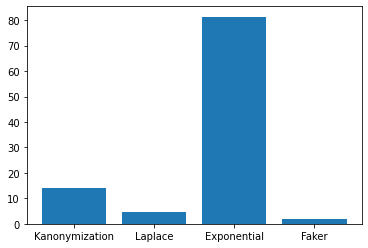

In [28]:
import matplotlib.pyplot as plt

x = ["Kanonymization","Laplace","Exponential","Faker"]
y = [t_kanon,t_laplace,t_exp,t_fake]

plt.bar(x,y)
plt.show()